<a href="https://colab.research.google.com/github/ryanczhang7/spotifyproject/blob/master/Spotify_Machine_Learning_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

**I want to see whether the audio features like liveness and loudness that came with target label popularity from the Spotify Web API, will perform better at predicting popularity, than the textual features like personality traits and sentiment analysis that I queried from a completely different source. Then I also want to see if adding the textual features onto my best audio features model will improve the performance of the model.**

In [0]:
import pandas as pd
import numpy as np

In [0]:
spotify_df = pd.read_csv("/content/drive/My Drive/spotify_complete.csv")
spotify_test = pd.read_csv('/content/drive/My Drive/spotify_test_data.csv')

In [0]:
spotify_df = spotify_df.iloc[:,1:]
spotify_df = spotify_df.drop("album_id", axis=1)
spotify_df

,song,album,artist,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,date,popularity,explicit,chain_lyrics,lyrics,polarity,magnitude,artistic,emotion,imagination,defiance,assertive,cheerful,outgoing,gregarious,modesty,stubborn,sympathy,trust,fiery,melancholy,immoderation,self-conscious,stress
0,Voices In My Head,Hoodie SZN,A Boogie Wit da Hoodie,0.0555,0.754,0.663,0.000000,6.0,0.1010,-6.311,0.0,0.4270,90.195,4.0,0.207,2018-12-21,58,1,monstas gon tear it up all she ever wanted was...,monstas gon tear it up all she ever wanted was...,-1.0,1.4,0.983429,0.269785,0.845684,0.833923,0.339471,0.814061,0.100284,0.099952,0.179199,0.670662,0.318997,0.001978,0.241852,0.780715,0.587846,0.719468,0.480640
1,Beasty,Hoodie SZN,A Boogie Wit da Hoodie,0.2920,0.860,0.418,0.000000,7.0,0.1060,-9.061,0.0,0.1580,126.023,4.0,0.374,2018-12-21,59,1,all that we know is the logos and hb \n the gl...,all that we know is the logos and hb the glock...,0.0,1.5,0.951363,0.118000,0.993211,0.778178,0.651997,0.856554,0.322349,0.608428,0.010153,0.048880,0.084278,0.000658,0.848225,0.664055,0.801688,0.390560,0.443472
2,I Did It,Hoodie SZN,A Boogie Wit da Hoodie,0.1530,0.718,0.454,0.000046,8.0,0.1160,-9.012,1.0,0.1270,89.483,4.0,0.196,2018-12-21,57,1,yeah i cant trust these bitches \n i dont got ...,yeah i cant trust these bitches i dont got no ...,-1.0,1.9,0.974373,0.406747,0.700611,0.815956,0.123845,0.771871,0.128306,0.112841,0.631363,0.718800,0.313936,0.001588,0.251038,0.798487,0.450389,0.736179,0.669987
3,Swervin,Hoodie SZN,A Boogie Wit da Hoodie,0.0153,0.581,0.662,0.000000,9.0,0.1110,-5.239,1.0,0.3030,93.023,4.0,0.434,2018-12-21,83,1,uh \n yeah \n oh thats london on da track run ...,uh yeah oh thats london on da track run that s...,0.5,1.4,0.945732,0.312331,0.866823,0.403949,0.815055,0.961068,0.834103,0.872156,0.008053,0.392424,0.068322,0.011624,0.523789,0.160812,0.532799,0.075188,0.109408
4,Startender,Hoodie SZN,A Boogie Wit da Hoodie,0.0235,0.736,0.622,0.000000,6.0,0.1510,-4.653,0.0,0.1330,191.971,4.0,0.506,2018-12-21,71,1,yeah shawty got ass she just got a tummy tuck ...,yeah shawty got ass she just got a tummy tuck ...,-1.0,2.5,0.921820,0.017407,0.824431,0.521194,0.549106,0.949360,0.699198,0.819306,0.011715,0.257703,0.042916,0.000842,0.599420,0.223387,0.610249,0.098895,0.122751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25457,Simple Machine,Evermotion,Guster,0.0101,0.624,0.794,0.004310,4.0,0.1370,-7.018,1.0,0.0476,167.970,4.0,0.781,2015-01-13,31,0,static steady plastic motion \n lights flash b...,static steady plastic motion lights flash beat...,-1.0,0.9,0.483210,0.614466,0.791187,0.004402,0.170147,0.476026,0.200341,0.314043,0.944821,0.947986,0.454287,0.011603,0.327810,0.959904,0.367588,0.505668,0.712661
25458,Expectation,Evermotion,Guster,0.4460,0.467,0.578,0.000170,11.0,0.0954,-6.467,1.0,0.0344,137.013,4.0,0.250,2015-01-13,19,0,im alive \n thats the expectation \n oh no \n ...,im alive thats the expectation oh no feels lik...,-1.0,0.3,0.999678,0.781936,0.994449,0.987118,0.005879,0.066235,0.001171,0.006887,0.490115,0.290116,0.856172,0.148689,0.391590,0.988559,0.477067,0.955391,0.976936
25459,Gangway,Evermotion,Guster,0.1130,0.447,0.753,0.004860,2.0,0.3550,-5.284,1.0,0.0284,123.460,4.0,0.431,2015-01-13,25,0,if i could make a wish of i could right a wron...,if i could make a wish of i could right a wron...,-1.0,0.7,0.999164,0.589154,0.999992,0.999748,0.094155,0.362654,0.114609,0.310047,0.026866,0.094465,0.841245,0.758046,0.699378,0.797153,0.943452,0.942651,0.640199
25460,Kid Dreams,Evermotion,Guster,0.2260,0.503,0.568,0.019500,5.0,0.0817,-8.075,1.0,0.0336,88.784,4.0,0.557,2015-01-13,24,0,so there i was fifteen stuck in \n high school...,so there i was fifteen stuck in high school wa...,1.0,0.2,0.975240,0.594793,0.909666,0.751356,0.315535,0.734684,0.207368,0.224545,0.631730,0.91

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


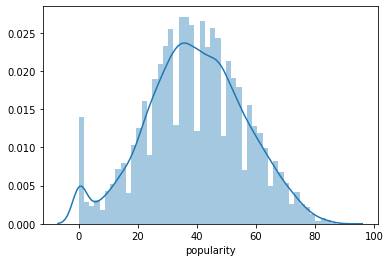

In [0]:
sns.distplot(spotify_df.popularity)

**The values of the target label popularity follow a normal-like distrubtion between 0 and 100. One discrepancy is that large amount of values with 0 popularity.**

# Base Model

In [0]:
pip install category_encoders

In [0]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [0]:
import lightgbm as lgb

**My method will be trying different combinations of different categorical encoders and different models to see which will perform the best on the date and explicit features, which are neither audio features nor textual features. It is basically an exhaustive search, except I move on from combinations that didn't work well.**

In [0]:
X_train = spotify_df[["explicit", "date"]]
y_train = spotify_df["popularity"]

ct = make_column_transformer(
    (ce.TargetEncoder(), ["explicit", "date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    RandomForestRegressor(max_features = 'sqrt')
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

20.41399591840684

In [0]:
ct = make_column_transformer(
    (ce.TargetEncoder(), ["explicit"]),
    (ce.CatBoostEncoder(), ["date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    RandomForestRegressor(max_features = 'sqrt')
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

20.479217534294413

In [0]:
ct = make_column_transformer(
    (ce.OneHotEncoder(), ["explicit"]),
    (ce.CatBoostEncoder(), ["date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    RandomForestRegressor(max_features = 'sqrt')
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

20.46674339413012

In [0]:
ct = make_column_transformer(
    (ce.OneHotEncoder(), ["explicit"]),
    (ce.TargetEncoder(), ["date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    RandomForestRegressor(max_features = 'sqrt')
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

20.381712737361802

In [0]:
ct = make_column_transformer(
    (ce.OneHotEncoder(), ["explicit", "date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    RandomForestRegressor(max_features = 'sqrt')
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

19.896860616545624

In [0]:
ct = make_column_transformer(
    (ce.OneHotEncoder(), ["explicit", "date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    RandomForestRegressor(max_features = 'sqrt')
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

In [0]:
ct = make_column_transformer(
    (ce.TargetEncoder(), ["date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    RandomForestRegressor(max_features = 'sqrt')
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

20.164546371268933

In [0]:
ct = make_column_transformer(
    (ce.OneHotEncoder(), ["date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    lgb.LGBMRegressor()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

18.218347824184367

In [0]:
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["date"]),
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    lgb.LGBMRegressor()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

20.69763822111574

In [0]:
ct = make_column_transformer(
    (ce.CatBoostEncoder(), ["date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    lgb.LGBMRegressor()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

19.406038811398894

In [0]:
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["date"]),
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    RandomForestRegressor(max_features = 'sqrt')
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

22.814165094539966

In [0]:
X_train = spotify_df[["explicit", "date"]]
y_train = spotify_df["popularity"]

ct = make_column_transformer(
    (ce.TargetEncoder(), ["explicit", "date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    LinearRegression()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

19.763058616164358

In [0]:
X_train = spotify_df[["explicit", "date"]]
y_train = spotify_df["popularity"]

ct = make_column_transformer(
    (ce.CatBoostEncoder(), ["explicit", "date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    LinearRegression()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

18.690554773569204

In [0]:
X_train = spotify_df[["explicit", "date"]]
y_train = spotify_df["popularity"]

ct = make_column_transformer(
    (ce.TargetEncoder(), ["explicit", "date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

19.762820225711646

In [0]:
ct = make_column_transformer(
    (ce.CatBoostEncoder(), ["date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

18.997309213076125

In [0]:
ct = make_column_transformer(
    (ce.CatBoostEncoder(), ["explicit", "date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

18.6903899328446

In [0]:
ct = make_column_transformer(
    (ce.CatBoostEncoder(), ["date"]),
    (ce.TargetEncoder(), ["explicit"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

18.690389932844592

In [0]:
ct = make_column_transformer(
    (ce.CatBoostEncoder(), ["date"]),
    (ce.OneHotEncoder(), ["explicit"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

18.690389932844592

In [0]:
ct = make_column_transformer(
    (ce.CatBoostEncoder(), ["date"]),
    (ce.JamesSteinEncoder(), ["explicit"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

18.690389932844592

In [0]:
ct = make_column_transformer(
    (ce.JamesSteinEncoder(), ["explicit", "date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

19.623352650746526

In [0]:
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["explicit", "date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.56709282631304

In [0]:
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["explicit", "date"]),
    (ce.CatBoostEncoder(), ["explicit"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.567091010729374

In [0]:
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["date"]),
    (ce.OneHotEncoder(), ["explicit"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.567092826313036

In [0]:
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["date"]),
    remainder="passthrough"
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.88687392056172

In [0]:
X_train = spotify_df[["date"]]
y_train = spotify_df["popularity"]

ct = make_column_transformer(
    (ce.CatBoostEncoder(), ["date"]),
    remainder="passthrough"
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

18.997309213076125

In [0]:
ct = make_column_transformer(
    (ce.CatBoostEncoder(), ["date"]),
    (ce.TargetEncoder(), ["explicit"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    KNeighborsRegressor()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

19.762481383197247

In [0]:
ct = make_column_transformer(
    (ce.CatBoostEncoder(), ["explicit", "date"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    KNeighborsRegressor()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

19.761985888907127

**So the best combination ends up being a Ridge model using OrdinalEncoder on date and OneHotEncoder on explicit. This is the model I will attempt to improve upon using textual or audio features.**

In [0]:
# My best model with just explicit and date
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["explicit", "date"]),
    (ce.CatBoostEncoder(), ["explicit"])
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.567091010729374

# Audio Features

In [0]:
list(spotify_df.columns.values)[3:15]

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

**I will try adding each individual audio feature to the base model by itself to see the scores. Then I will iteratively add the features with the best scores to an overall model until the overall score stops improving**

In [0]:
scores = {}
scores["feature"] = []
scores["score"] = []

for feature in list(spotify_df.columns.values)[3:15]:
  X_train = spotify_df[["date", "explicit"] + [feature]]
  y_train = spotify_df["popularity"]

  ct = make_column_transformer(
      (ce.OrdinalEncoder(), ["explicit", "date"]),
      (ce.CatBoostEncoder(), ["explicit"]),
      remainder="passthrough"
  )

  pipeline = make_pipeline(
      ct,
      StandardScaler(),
      Ridge()
  )

  cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                            scoring="neg_root_mean_squared_error", cv=10)

  scores["feature"].append(feature)
  scores["score"].append(cv_errs.mean())

pd.DataFrame(scores)

,feature,score
0,acousticness,16.564299
1,danceability,16.383309
2,energy,16.572595
3,instrumentalness,16.473265
4,key,16.568124
5,liveness,16.506514
6,loudness,16.506282
7,mode,16.557202
8,speechiness,16.557361
9,tempo,16.567661


In [0]:
scores = {}
scores["feature"] = []
scores["score"] = []

# Iteratively adding the next best feature to the overall model
for features in [["danceability"],
                ["danceability", "instrumentalness"],
                ["danceability", "instrumentalness", "loudness"],
                ["danceability", "instrumentalness", "liveness", "loudness"],
                ["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature"],
                ["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature", "mode"],
                ["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature", "mode", "speechiness"],
                ["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature", "mode", "speechiness", "acousticness"],
                ["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature", "mode", "speechiness", "acousticness",
                 "tempo"],
                ["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature", "mode", "speechiness", "acousticness",
                 "tempo", "key"]]:

  X_train = spotify_df[["date", "explicit"] + features]
  y_train = spotify_df["popularity"]

  ct = make_column_transformer(
      (ce.OrdinalEncoder(), ["explicit", "date"]),
      (ce.CatBoostEncoder(), ["explicit"]),
      remainder="passthrough"
  )

  pipeline = make_pipeline(
      ct,
      StandardScaler(),
      Ridge()
  )

  cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                            scoring="neg_root_mean_squared_error", cv=10)

  scores["feature"].append(features)
  scores["score"].append(cv_errs.mean())

pd.DataFrame(scores)

,feature,score
0,[danceability],16.383309
1,"[danceability, instrumentalness]",16.323769
2,"[danceability, instrumentalness, loudness]",16.272790
3,"[danceability, instrumentalness, liveness, lou...",16.226031
4,"[danceability, instrumentalness, liveness, lou...",16.223574
5,"[danceability, instrumentalness, liveness, lou...",16.216583
6,"[danceability, instrumentalness, liveness, lou...",16.206891
7,"[danceability, instrumentalness, liveness, lou...",16.210522
8,"[danceability, instrumentalness, liveness, lou...",16.207925
9,"[danceability, instrumentalness, liveness, lou...",16.208353


**I see that the minimum is at row 6, but that the score decreased twice. It went back up when I added acousticness, so let's retry the best rows without acousticness.**

In [0]:
pd.DataFrame(scores).iloc[6,0]

['danceability',
 'instrumentalness',
 'liveness',
 'loudness',
 'time_signature',
 'mode',
 'speechiness']

In [0]:
pd.DataFrame(scores).iloc[8,0]

['danceability',
 'instrumentalness',
 'liveness',
 'loudness',
 'time_signature',
 'mode',
 'speechiness',
 'acousticness',
 'tempo']

In [0]:
scores = {}
scores["feature"] = []
scores["score"] = []

for features in [["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature", "mode", "speechiness"],
                ["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature", "mode", "speechiness", "acousticness"],
                ["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature", "mode", "speechiness", "acousticness",
                 "tempo"],
                ["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature", "mode", "speechiness", "acousticness",
                 "tempo", "key"],
                ["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature", "mode", "speechiness", "tempo"],
                ["danceability", "instrumentalness", "liveness", "loudness",
                 "time_signature", "mode", "speechiness", "tempo", "key"]]:

  X_train = spotify_df[["date", "explicit"] + features]
  y_train = spotify_df["popularity"]

  ct = make_column_transformer(
      (ce.OrdinalEncoder(), ["explicit", "date"]),
      (ce.CatBoostEncoder(), ["explicit"]),
      remainder="passthrough"
  )

  pipeline = make_pipeline(
      ct,
      StandardScaler(),
      Ridge()
  )

  cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                            scoring="neg_root_mean_squared_error", cv=10)

  scores["feature"].append(features)
  scores["score"].append(cv_errs.mean())

pd.DataFrame(scores)

,feature,score
0,"[danceability, instrumentalness, liveness, lou...",16.206891
1,"[danceability, instrumentalness, liveness, lou...",16.210522
2,"[danceability, instrumentalness, liveness, lou...",16.207925
3,"[danceability, instrumentalness, liveness, lou...",16.208353
4,"[danceability, instrumentalness, liveness, lou...",16.204955
5,"[danceability, instrumentalness, liveness, lou...",16.205435


In [0]:
# This is my set of best set of features for audio features
pd.DataFrame(scores).iloc[4,0]

['danceability',
 'instrumentalness',
 'liveness',
 'loudness',
 'time_signature',
 'mode',
 'speechiness',
 'tempo']

In [0]:
X_train = spotify_df[["date", "explicit", 'danceability', 'instrumentalness',
                      'liveness', 'loudness', 'time_signature', 'mode',
                      'speechiness', 'tempo']]
y_train = spotify_df["popularity"]
  
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["explicit", "date"]),
    (ce.CatBoostEncoder(), ["explicit"]),
    remainder="passthrough"
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.20495529512479

**Now I will hyperparameter tune the Ridge model.**

In [0]:
# I started out with alphas of smaller than 1 and between 1 and 10, but
# increasing the alpha consistenly decreased the rmses, until the thousands
# I also made sure to check for any double descent for much larger alphas
clf = GridSearchCV(pipeline,
                   param_grid={"ridge__alpha": [range(4925, 4975)]},
                   scoring="neg_mean_squared_error",
                   cv=10)
clf.fit(X_train, y_train)
clf.best_estimator_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(cols=None,
                                                                 drop_invariant=False,
                                                                 handle_missing='value',
                                                                 handle_unknown='value',
                                                                 mapping=None,
                                                                 return_df=True,
                                                                 verbose=0),
                                                  ['explicit', 'date']),
                              

**This is my best audio features model so far.**

In [0]:
X_train = spotify_df[["date", "explicit", 'danceability', 'instrumentalness',
                      'liveness', 'loudness', 'time_signature', 'mode',
                      'speechiness', 'tempo']]
y_train = spotify_df["popularity"]
  
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["explicit", "date"]),
    (ce.CatBoostEncoder(), ["explicit"]),
    remainder="passthrough"
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge(alpha=4956)
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.181085359321823

# Textual Features

**I will use the same process as before for feature selection, model selection, and encodings selection.**

In [0]:
spotify_df["sentiment"] = spotify_df["polarity"] * spotify_df["magnitude"]
spotify_df

,song,album,artist,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,date,popularity,explicit,chain_lyrics,lyrics,polarity,magnitude,artistic,emotion,imagination,defiance,assertive,cheerful,outgoing,gregarious,modesty,stubborn,sympathy,trust,fiery,melancholy,immoderation,self-conscious,stress,sentiment
0,Voices In My Head,Hoodie SZN,A Boogie Wit da Hoodie,0.0555,0.754,0.663,0.000000,6.0,0.1010,-6.311,0.0,0.4270,90.195,4.0,0.207,2018-12-21,58,1,monstas gon tear it up all she ever wanted was...,monstas gon tear it up all she ever wanted was...,-1.0,1.4,0.983429,0.269785,0.845684,0.833923,0.339471,0.814061,0.100284,0.099952,0.179199,0.670662,0.318997,0.001978,0.241852,0.780715,0.587846,0.719468,0.480640,-1.4
1,Beasty,Hoodie SZN,A Boogie Wit da Hoodie,0.2920,0.860,0.418,0.000000,7.0,0.1060,-9.061,0.0,0.1580,126.023,4.0,0.374,2018-12-21,59,1,all that we know is the logos and hb \n the gl...,all that we know is the logos and hb the glock...,0.0,1.5,0.951363,0.118000,0.993211,0.778178,0.651997,0.856554,0.322349,0.608428,0.010153,0.048880,0.084278,0.000658,0.848225,0.664055,0.801688,0.390560,0.443472,0.0
2,I Did It,Hoodie SZN,A Boogie Wit da Hoodie,0.1530,0.718,0.454,0.000046,8.0,0.1160,-9.012,1.0,0.1270,89.483,4.0,0.196,2018-12-21,57,1,yeah i cant trust these bitches \n i dont got ...,yeah i cant trust these bitches i dont got no ...,-1.0,1.9,0.974373,0.406747,0.700611,0.815956,0.123845,0.771871,0.128306,0.112841,0.631363,0.718800,0.313936,0.001588,0.251038,0.798487,0.450389,0.736179,0.669987,-1.9
3,Swervin,Hoodie SZN,A Boogie Wit da Hoodie,0.0153,0.581,0.662,0.000000,9.0,0.1110,-5.239,1.0,0.3030,93.023,4.0,0.434,2018-12-21,83,1,uh \n yeah \n oh thats london on da track run ...,uh yeah oh thats london on da track run that s...,0.5,1.4,0.945732,0.312331,0.866823,0.403949,0.815055,0.961068,0.834103,0.872156,0.008053,0.392424,0.068322,0.011624,0.523789,0.160812,0.532799,0.075188,0.109408,0.7
4,Startender,Hoodie SZN,A Boogie Wit da Hoodie,0.0235,0.736,0.622,0.000000,6.0,0.1510,-4.653,0.0,0.1330,191.971,4.0,0.506,2018-12-21,71,1,yeah shawty got ass she just got a tummy tuck ...,yeah shawty got ass she just got a tummy tuck ...,-1.0,2.5,0.921820,0.017407,0.824431,0.521194,0.549106,0.949360,0.699198,0.819306,0.011715,0.257703,0.042916,0.000842,0.599420,0.223387,0.610249,0.098895,0.122751,-2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25457,Simple Machine,Evermotion,Guster,0.0101,0.624,0.794,0.004310,4.0,0.1370,-7.018,1.0,0.0476,167.970,4.0,0.781,2015-01-13,31,0,static steady plastic motion \n lights flash b...,static steady plastic motion lights flash beat...,-1.0,0.9,0.483210,0.614466,0.791187,0.004402,0.170147,0.476026,0.200341,0.314043,0.944821,0.947986,0.454287,0.011603,0.327810,0.959904,0.367588,0.505668,0.712661,-0.9
25458,Expectation,Evermotion,Guster,0.4460,0.467,0.578,0.000170,11.0,0.0954,-6.467,1.0,0.0344,137.013,4.0,0.250,2015-01-13,19,0,im alive \n thats the expectation \n oh no \n ...,im alive thats the expectation oh no feels lik...,-1.0,0.3,0.999678,0.781936,0.994449,0.987118,0.005879,0.066235,0.001171,0.006887,0.490115,0.290116,0.856172,0.148689,0.391590,0.988559,0.477067,0.955391,0.976936,-0.3
25459,Gangway,Evermotion,Guster,0.1130,0.447,0.753,0.004860,2.0,0.3550,-5.284,1.0,0.0284,123.460,4.0,0.431,2015-01-13,25,0,if i could make a wish of i could right a wron...,if i could make a wish of i could right a wron...,-1.0,0.7,0.999164,0.589154,0.999992,0.999748,0.094155,0.362654,0.114609,0.310047,0.026866,0.094465,0.841245,0.758046,0.699378,0.797153,0.943452,0.942651,0.640199,-0.7
25460,Kid Dreams,Evermotion,Guster,0.2260,0.503,0.568,0.019500,5.0,0.0817,-8.075,1.0,0.0336,88.784,4.0,0.557,2015-01-13,24,0,so there i was fifteen stuck in \n high school...,so there i was fifteen stuck in high school wa...,1.0,0.2,0.975240,0.594793,0.909666,0.7513

In [0]:
list(spotify_df.columns.values)

['song',
 'album',
 'artist',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'date',
 'popularity',
 'explicit',
 'chain_lyrics',
 'lyrics',
 'polarity',
 'magnitude',
 'artistic',
 'emotion',
 'imagination',
 'defiance',
 'assertive',
 'cheerful',
 'outgoing',
 'gregarious',
 'modesty',
 'stubborn',
 'sympathy',
 'trust',
 'fiery',
 'melancholy',
 'immoderation',
 'self-conscious',
 'stress',
 'sentiment']

In [0]:
scores = {}
scores["feature"] = []
scores["score"] = []

for feature in list(spotify_df.columns.values)[20:]:
  X_train = spotify_df[["date", "explicit"] + [feature]]
  y_train = spotify_df["popularity"]

  ct = make_column_transformer(
      (ce.OrdinalEncoder(), ["explicit", "date"]),
      (ce.CatBoostEncoder(), ["explicit"]),
      remainder="passthrough"
  )

  pipeline = make_pipeline(
      ct,
      StandardScaler(),
      Ridge()
  )

  cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                            scoring="neg_root_mean_squared_error", cv=10)

  scores["feature"].append(feature)
  scores["score"].append(cv_errs.mean())

pd.DataFrame(scores)

,feature,score
0,polarity,16.572607
1,magnitude,16.535896
2,artistic,16.566078
3,emotion,16.568422
4,imagination,16.543921
5,defiance,16.567351
6,assertive,16.559057
7,cheerful,16.519665
8,outgoing,16.572963
9,gregarious,16.557115


In [0]:
scores = {}
scores["feature"] = []
scores["score"] = []

for features in [["sympathy"],
                ["sympathy", "cheerful"],
                ["sympathy", "cheerful", "trust"],
                ["sympathy", "cheerful", "trust", "magnitude"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress", "assertive"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress", "assertive", "fiery"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress", "assertive", "fiery",
                 "artistic"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress", "assertive", "fiery",
                 "artistic", "defiance"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress", "assertive", "fiery",
                 "artistic", "defiance", "emotion"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress", "assertive", "fiery",
                 "artistic", "defiance", "emotion", "stubborn"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress", "assertive", "fiery",
                 "artistic", "defiance", "emotion", "stubborn", "modesty"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress", "assertive", "fiery",
                 "artistic", "defiance", "emotion", "stubborn", "modesty",
                 "sentiment"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress", "assertive", "fiery",
                 "artistic", "defiance", "emotion", "stubborn", "modesty",
                 "sentiment", "melancholy"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress", "assertive", "fiery",
                 "artistic", "defiance", "emotion", "stubborn", "modesty",
                 "sentiment", "melancholy", "self-conscious"],
                ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                 "immoderation", "gregarious", "stress", "assertive", "fiery",
                 "artistic", "defiance", "emotion", "stubborn", "modesty",
                 "sentiment", "melancholy", "self-conscious", "polarity"]]:

  X_train = spotify_df[["date", "explicit"] + features]
  y_train = spotify_df["popularity"]

  ct = make_column_transformer(
      (ce.OrdinalEncoder(), ["explicit", "date"]),
      (ce.CatBoostEncoder(), ["explicit"]),
      remainder="passthrough"
  )

  pipeline = make_pipeline(
      ct,
      StandardScaler(),
      Ridge()
  )

  cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                            scoring="neg_root_mean_squared_error", cv=10)

  scores["feature"].append(features)
  scores["score"].append(cv_errs.mean())

pd.DataFrame(scores)

,feature,score
0,[sympathy],16.515717
1,"[sympathy, cheerful]",16.478150
2,"[sympathy, cheerful, trust]",16.446051
3,"[sympathy, cheerful, trust, magnitude]",16.423025
4,"[sympathy, cheerful, trust, magnitude, imagina...",16.419604
5,"[sympathy, cheerful, trust, magnitude, imagina...",16.381889
6,"[sympathy, cheerful, trust, magnitude, imagina...",16.378239
7,"[sympathy, cheerful, trust, magnitude, imagina...",16.324171
8,"[sympathy, cheerful, trust, magnitude, imagina...",16.318838
9,"[sympathy, cheerful, trust, magnitude, imagina...",16.318972


**I notice that several times the score increases when adding a feature. Let's try not adding it but adding the ones below that did decrease the score.**

In [0]:
scores = {}
scores["feature"] = []
scores["score"] = []

for features in [["sympathy", "cheerful", "trust", "magnitude", "imagination",
                  "immoderation", "gregarious", "stress", "fiery",
                  "artistic", "defiance", "stubborn"],
                 ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                  "immoderation", "gregarious", "stress", "fiery",
                  "artistic", "defiance", "stubborn", "modesty", "melancholy"],
                 ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                  "immoderation", "gregarious", "stress", "fiery",
                  "artistic", "defiance", "stubborn", "modesty",
                  "melancholy", "self-conscious"],
                 ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                  "immoderation", "gregarious", "stress", "fiery",
                  "artistic", "defiance", "emotion", "stubborn", "modesty",
                  "sentiment", "melancholy", "self-conscious"],
                 ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                  "immoderation", "gregarious", "stress", "fiery",
                  "artistic", "defiance", "stubborn", "modesty",
                  "sentiment", "melancholy", "self-conscious"],
                 ["sympathy", "cheerful", "trust", "magnitude", "imagination",
                  "immoderation", "gregarious", "stress", "assertive", "fiery",
                  "artistic", "defiance", "emotion", "stubborn", "modesty",
                  "melancholy", "self-conscious"]]:

  X_train = spotify_df[["date", "explicit"] + features]
  y_train = spotify_df["popularity"]

  ct = make_column_transformer(
      (ce.OrdinalEncoder(), ["explicit", "date"]),
      (ce.CatBoostEncoder(), ["explicit"]),
      remainder="passthrough"
  )

  pipeline = make_pipeline(
      ct,
      StandardScaler(),
      Ridge()
  )

  cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                            scoring="neg_root_mean_squared_error", cv=10)

  scores["feature"].append(features)
  scores["score"].append(cv_errs.mean())

pd.DataFrame(scores)

,feature,score
0,"[sympathy, cheerful, trust, magnitude, imagina...",16.298032
1,"[sympathy, cheerful, trust, magnitude, imagina...",16.298608
2,"[sympathy, cheerful, trust, magnitude, imagina...",16.283818
3,"[sympathy, cheerful, trust, magnitude, imagina...",16.279663
4,"[sympathy, cheerful, trust, magnitude, imagina...",16.285845
5,"[sympathy, cheerful, trust, magnitude, imagina...",16.278008


In [0]:
pd.DataFrame(scores).iloc[5,0]

['sympathy',
 'cheerful',
 'trust',
 'magnitude',
 'imagination',
 'immoderation',
 'gregarious',
 'stress',
 'assertive',
 'fiery',
 'artistic',
 'defiance',
 'emotion',
 'stubborn',
 'modesty',
 'melancholy',
 'self-conscious']

In [0]:
X_train = spotify_df[["date", "explicit", 'sympathy', 'cheerful', 'trust',
                      'magnitude', 'imagination', 'immoderation', 'gregarious',
                      'stress', 'assertive', 'fiery', 'artistic', 'defiance', 
                      'emotion', 'stubborn', 'modesty', 'melancholy', 
                      'self-conscious']]
y_train = spotify_df["popularity"]
  
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["explicit", "date"]),
    (ce.CatBoostEncoder(), ["explicit"]),
    remainder="passthrough"
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train, 
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.27800802837183

In [0]:
# I started out with alphas of smaller than 1 and between 1 and 10, but
# increasing the alpha consistenly decreased the rmses, until the thousands
# I also made sure to check for any double descent for much larger alphas
clf = GridSearchCV(pipeline,
                   param_grid={"ridge__alpha": range(2475, 2525)},
                   scoring="neg_mean_squared_error",
                   cv=10)
clf.fit(X_train, y_train)
clf.best_estimator_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(cols=None,
                                                                 drop_invariant=False,
                                                                 handle_missing='value',
                                                                 handle_unknown='value',
                                                                 mapping=None,
                                                                 return_df=True,
                                                                 verbose=0),
                                                  ['explicit', 'date']),
                              

**So this is my best textual features model so far.**

In [0]:
X_train = spotify_df[["date", "explicit", 'sympathy', 'cheerful', 'trust',
                      'magnitude', 'imagination', 'immoderation', 'gregarious',
                      'stress', 'assertive', 'fiery', 'artistic', 'defiance', 
                      'emotion', 'stubborn', 'modesty', 'melancholy', 
                      'self-conscious']]
y_train = spotify_df["popularity"]
  
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["explicit", "date"]),
    (ce.CatBoostEncoder(), ["explicit"]),
    remainder="passthrough"
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge(alpha=2508)
)

cv_errs = -cross_val_score(pipeline, X_train, y_train,
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.26503375724659

# Result

**Upon comparison of my best audio features and best textual features model so far, which both used Ridge model and the same category encoders, Audio features wins. Next I will try combining the two models. I can do this by adding the features together, since all the numerical features are just StandardScaled. I can also do this by using an ensemble model of them together. I would assume the ensemble would do better, but I will see.**

In [0]:
X_train = spotify_df[["date", "explicit", 'sympathy', 'cheerful', 'trust',
                      'magnitude', 'imagination', 'immoderation', 'gregarious',
                      'stress', 'assertive', 'fiery', 'artistic', 'defiance', 
                      'emotion', 'stubborn', 'modesty', 'melancholy', 
                      'self-conscious', 'danceability', 'instrumentalness',
                      'liveness', 'loudness', 'time_signature', 'mode',
                      'speechiness', 'tempo']]
y_train = spotify_df["popularity"]
  
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["explicit", "date"]),
    (ce.CatBoostEncoder(), ["explicit"]),
    remainder="passthrough"
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge(alpha=2508)
)

cv_errs = -cross_val_score(pipeline, X_train, y_train,
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.032819723878696

**The model with the all the features does do better, but lets hyperparameter tune again.**

In [0]:
clf = GridSearchCV(pipeline,
                   param_grid={"ridge__alpha": range(2560,2580)},
                   scoring="neg_mean_squared_error",
                   cv=10)
clf.fit(X_train, y_train)
clf.best_estimator_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(cols=None,
                                                                 drop_invariant=False,
                                                                 handle_missing='value',
                                                                 handle_unknown='value',
                                                                 mapping=None,
                                                                 return_df=True,
                                                                 verbose=0),
                                                  ['explicit', 'date']),
                              

In [0]:
X_train = spotify_df[["date", "explicit", 'sympathy', 'cheerful', 'trust',
                      'magnitude', 'imagination', 'immoderation', 'gregarious',
                      'stress', 'assertive', 'fiery', 'artistic', 'defiance', 
                      'emotion', 'stubborn', 'modesty', 'melancholy', 
                      'self-conscious', 'danceability', 'instrumentalness',
                      'liveness', 'loudness', 'time_signature', 'mode',
                      'speechiness', 'tempo']]
y_train = spotify_df["popularity"]
  
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["explicit", "date"]),
    (ce.CatBoostEncoder(), ["explicit"]),
    remainder="passthrough"
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    Ridge(alpha=2578)
)

cv_errs = -cross_val_score(pipeline, X_train, y_train,
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.03270595873836

**This is pretty good performance, but I need to get an actual test error. This model could be overfitted. Earlier I chose this over LightGBM when I should've checked test error to choose between them. That is a mistake.**

In [0]:
pipeline.fit(X_train, y_train)
preds = pipeline.predict(spotify_test[["date", "explicit", 'sympathy', 'cheerful', 'trust',
                      'magnitude', 'imagination', 'immoderation', 'gregarious',
                      'stress', 'assertive', 'fiery', 'artistic', 'defiance', 
                      'emotion', 'stubborn', 'modesty', 'melancholy', 
                      'self-conscious', 'danceability', 'instrumentalness',
                      'liveness', 'loudness', 'time_signature', 'mode',
                      'speechiness', 'tempo']])

In [0]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(preds, spotify_test["popularity"]))

25.132266782264814

**The score decreases drastically when on test data.**

In [0]:
X_train = spotify_df[["date", "explicit", 'sympathy', 'cheerful', 'trust',
                      'magnitude', 'imagination', 'immoderation', 'gregarious',
                      'stress', 'assertive', 'fiery', 'artistic', 'defiance', 
                      'emotion', 'stubborn', 'modesty', 'melancholy', 
                      'self-conscious', 'danceability', 'instrumentalness',
                      'liveness', 'loudness', 'time_signature', 'mode',
                      'speechiness', 'tempo']]
y_train = spotify_df["popularity"]
  
ct = make_column_transformer(
    (ce.OrdinalEncoder(), ["explicit", "date"]),
    (ce.CatBoostEncoder(), ["explicit"]),
    remainder="passthrough"
)

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    lgb.LGBMRegressor()
)

cv_errs = -cross_val_score(pipeline, X_train, y_train,
                          scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

16.660256632997697

In [0]:
pipeline.fit(X_train, y_train)
preds = pipeline.predict(spotify_test[["date", "explicit", 'sympathy', 'cheerful', 'trust',
                      'magnitude', 'imagination', 'immoderation', 'gregarious',
                      'stress', 'assertive', 'fiery', 'artistic', 'defiance', 
                      'emotion', 'stubborn', 'modesty', 'melancholy', 
                      'self-conscious', 'danceability', 'instrumentalness',
                      'liveness', 'loudness', 'time_signature', 'mode',
                      'speechiness', 'tempo']])
np.sqrt(mean_squared_error(preds, spotify_test["popularity"]))

23.293936820140708

**When I just replace the Ridge model with LightGBM, I get a better test error. I should compare the best audio features model and textual features model using LightGBM.**

**With the above in mind, I should consider not only the best LightGBM models, but an ensemble of the best Ridge models with the best LightGBM models, when comparing audio vs textaul, and when trying to obtain the best possible model for predicting popularity.**

will be continued.